In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import datetime
import pickle
from scipy import sparse as sp
import implicit

In [2]:
path = r'D:\coding\bitbucket_repo_dl\data_mail\2021\ml_task_A\data\train.csv' 

with open(path, 'r') as my_file:
    df = pd.read_csv(my_file, delimiter=',')
users = [([]) for i in range(15000)]
for i in range(len(df)):
    row = df.values[i]
    users[int(row[0])].append(int(row[1]))



In [3]:
for i in range(3):
    print(users[i])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
[63, 53, 66, 10, 42, 67, 27, 47, 17, 21, 68, 35, 69, 25, 13, 37, 29, 70, 71, 72, 34, 49, 32, 73, 74, 15, 75, 76, 7, 77, 57, 8, 48, 56, 18, 78, 79, 59, 80, 81, 82, 83, 84, 85, 86, 87, 41, 88, 89, 90, 23, 91]
[7, 14, 58, 3, 27, 65, 48, 63, 17, 94, 31, 95, 96, 11, 97, 38, 19, 98, 90, 66, 25, 99, 100, 4, 24, 57, 30, 33, 101, 78, 102, 103, 34, 42, 43, 104, 47, 105, 53, 106, 76, 88, 2, 107, 21, 92, 108, 109, 110, 111, 59, 51]


In [4]:
max_item = np.max(users)
max_item = max(max_item)
print(max_item)

max_len = 0
for u in users:
    if len(u) > max_len:
        max_len = len(u)
print(max_len)
        

190
65


C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


0


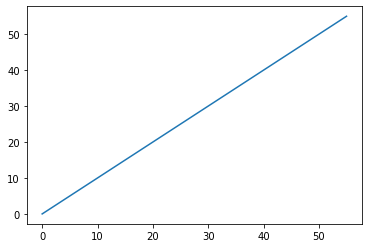

1


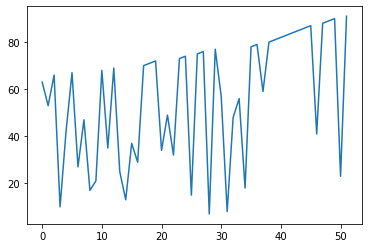

2


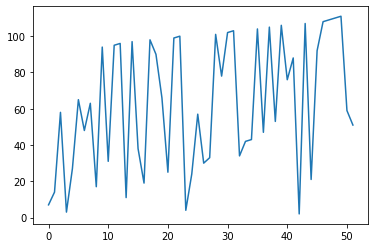

3


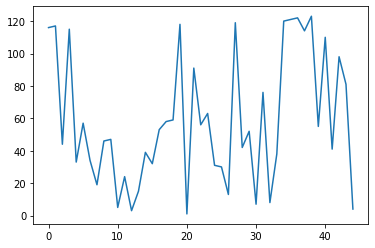

4


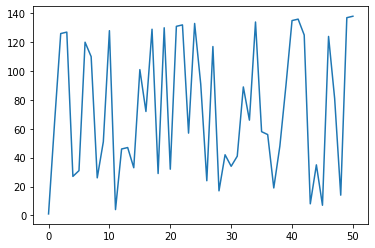

5


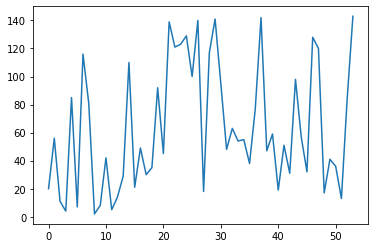

6


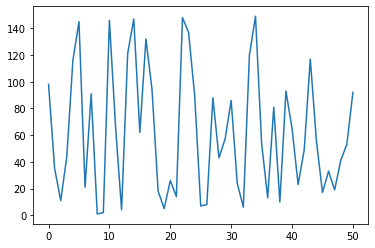

7


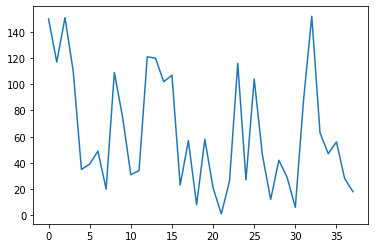

8


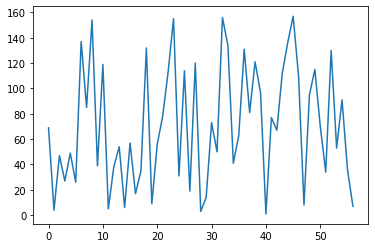

9


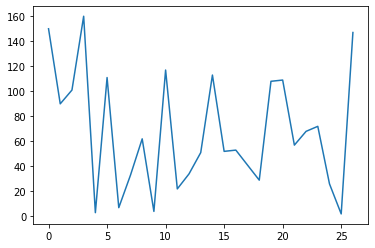

10


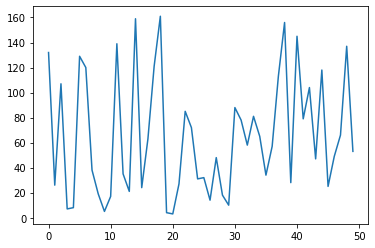

In [10]:
for i, u in enumerate(users):
    if i > 10: break
    print(i)
    fig, ((ax1)) = plt.subplots(nrows=1, ncols=1)
    ax1.plot(u)
    plt.show()

In [6]:
def make_coo_row(row, items = 191):
    values = []
    idx=[]
    for r in row:
        values.append(1)
        idx.append(r)
    return sp.coo_matrix((np.array(values).astype(int), ([0] * len(idx), idx)), shape=(1, items))

In [7]:
rows=[]
for u in users:
    rows.append(make_coo_row(u))
X_sparse = sp.vstack(rows).tocsr()

model = implicit.als.AlternatingLeastSquares(factors=256, regularization=0, iterations=100, calculate_training_loss = True)
model.fit(X_sparse.T)


  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
res = []
for i, u in enumerate(users):
    row_sparse = make_coo_row(u).tocsr()
    rec = model.recommend(i, row_sparse, N=3, filter_already_liked_items=False, recalculate_user=False)
    res.append(rec[0][0])
    res.append(rec[1][0])
    res.append(rec[2][0])
print(len(res))

45000


In [9]:
with open('../data/sample-submission.csv', 'r') as my_file:
    df_res = pd.read_csv(my_file)
df_res.item_id = res
df_res.to_csv(f'../answers/v6/result_{datetime.datetime.now().strftime("%d.%m.%Y_%H.%M.%S")}.csv', index=False)
